In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dfx = pd.read_csv('csv_files/normalx.csv', index_col=0)
dfx.head()

,C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,...,S3,C3p,C5p,C6p,LongSentences,RealWords,LongWords,PositiveWords,NegativeWords,UncertainWords
0,122.0,1.0,3.43,0.029074,40962052.0,10600000.0,51.345,470.0,12719.0,11560.0,...,139.0,1,3.864345,11.111111,0.640426,0.908876,0.054250,0.004875,0.009199,0.010929
1,259.0,0.0,-1.62,-0.013352,28869196.0,2400000.0,25.936,791.0,21792.0,19585.0,...,237.0,0,12.028832,0.000000,0.644753,0.898724,0.051395,0.003258,0.011105,0.010876
2,90.0,1.0,-1.24,0.020715,16845668.0,5000000.0,7.378,201.0,5262.0,4785.0,...,60.0,0,3.369134,0.000000,0.636816,0.909350,0.061764,0.011593,0.006271,0.011403
3,209.0,1.0,-0.91,0.020023,14848637.0,4500000.0,8.526,328.0,8259.0,7574.0,...,110.0,0,3.299697,0.000000,0.539634,0.917060,0.061630,0.009686,0.007144,0.013319
4,80.0,1.0,0.07,-0.034895,30741716.0,8250000.0,632.298,572.0,14830.0,13176.0,...,167.0,1,3.726269,5.000000,0.587413,0.888469,0.048550,0.004518,0.010047,0.011261


In [3]:
dfx.skew()

C1                 5.742449
C2                -2.102918
C3                21.157185
C4                -0.485756
C5                13.661534
C6                12.614696
C7                12.382952
T1                 1.740406
T2                 1.639730
T3                 1.617222
T4                 1.420097
T5                12.772259
S1                 2.312075
S2                 3.737300
S3                 3.439784
C3p               -0.117764
C5p               10.648764
C6p                4.436698
LongSentences      0.079998
RealWords         25.462582
LongWords         26.111002
PositiveWords     20.846925
NegativeWords     10.311730
UncertainWords    22.121962
dtype: float64

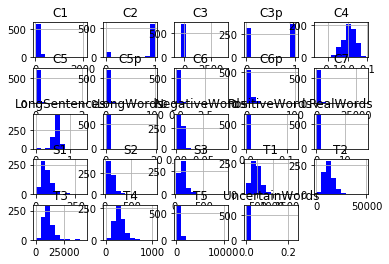

In [4]:
for col in dfx.columns:
    dfx.hist(color='blue')
    break
plt.show()

In [5]:
dfx['C1'] = np.cbrt(np.sqrt(dfx['C1']))
dfx['C1'].skew()

0.8604030074298509

In [6]:
dfx['C3'] = np.cbrt(np.sqrt(dfx['C3']))
dfx['C3'].skew()

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


3.249358812850385

In [7]:
dfx['C5'] = np.log(dfx['C5'])
dfx['C5'].skew()

0.7855411470954896

In [8]:
dfx['C6'] = np.log(dfx['C6'])
dfx['C6'].skew()

0.6642273809763178

In [9]:
dfx['C7'] = np.cbrt(np.sqrt(dfx['C7']))
dfx['C7'].skew()

0.42965828360148195

In [10]:
dfx['T1'] = np.sqrt(dfx['T1'])
dfx['T1'].skew()

0.6706540494201525

In [11]:
dfx['T2'] = np.sqrt(dfx['T2'])
dfx['T2'].skew()

0.2592280288366243

In [12]:
dfx['T3'] = np.sqrt(dfx['T3'])
dfx['T3'].skew()

0.1698578718543317

In [13]:
dfx['T4'] = np.sqrt(dfx['T4'])
dfx['T4'].skew()

0.18555661504791

In [14]:
dfx['T5'] = np.cbrt(np.sqrt(dfx['T5']))
dfx['T5'].skew()

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


1.0213509037174717

In [15]:
dfx['S1'] = np.cbrt(dfx['S1'])
dfx['S1'].skew()

0.024719099412808105

In [16]:
dfx['S2'] = np.cbrt(np.sqrt(dfx['S2']))
dfx['S2'].skew()

0.6530193847582565

In [17]:
dfx['S3'] = np.cbrt(np.sqrt(dfx['S3']))
dfx['S3'].skew()

0.42063329582422193

In [18]:
#dfx['C3p'] = np.sqrt(dfx['C3p'])
#dfx['C3p'].skew()

In [19]:
dfx['C5p'] = np.log(dfx['C5p'])
dfx['C5p'].skew()

0.8217829602661499

In [20]:
dfx['C6p'] = np.cbrt(np.sqrt(dfx['C6p']))
dfx['C6p'].skew()

0.6042543530587301

In [21]:
#df['LongSentences'] = np.cbrt(df['LongSentences'])
#df['LongSentences'].skew()

In [22]:
dfx['RealWords'] = np.log((dfx['RealWords'])+1)
dfx['RealWords'].skew()

13.771855344274266

In [23]:
dfx['LongWords'] = np.cbrt(np.sqrt(dfx['LongWords']))
dfx['LongWords'].skew()

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


6.244037423912569

In [24]:
dfx['PositiveWords'] = np.cbrt(dfx['PositiveWords'])
dfx['PositiveWords'].skew()

1.2539499866193393

In [25]:
dfx['NegativeWords'] = np.cbrt(dfx['NegativeWords'])
dfx['NegativeWords'].skew()

0.021245196574128076

In [26]:
dfx['UncertainWords'] = np.cbrt(dfx['UncertainWords'])
dfx['UncertainWords'].skew()

3.2245723147414767

In [27]:
dfx.skew()

C1                 0.860403
C2                -2.102918
C3                 3.249359
C4                -0.485756
C5                 0.785541
C6                 0.664227
C7                 0.429658
T1                 0.670654
T2                 0.259228
T3                 0.169858
T4                 0.185557
T5                 1.021351
S1                 0.024719
S2                 0.653019
S3                 0.420633
C3p               -0.117764
C5p                0.821783
C6p                0.604254
LongSentences      0.079998
RealWords         13.771855
LongWords          6.244037
PositiveWords      1.253950
NegativeWords      0.021245
UncertainWords     3.224572
dtype: float64

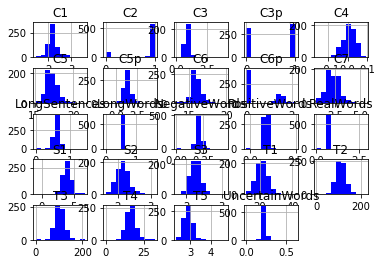

In [28]:
for col in dfx.columns:
    dfx.hist(color='blue')
    break
plt.show()

In [29]:
dfx.head()

,C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,...,S3,C3p,C5p,C6p,LongSentences,RealWords,LongWords,PositiveWords,NegativeWords,UncertainWords
0,2.227033,1.0,1.228049,0.029074,17.528157,16.176365,1.927893,21.679483,112.778544,107.517440,...,2.275984,1,1.351792,1.493802,0.640426,0.646515,0.615270,0.169556,0.209529,0.221915
1,2.524740,0.0,NaN,-0.013352,17.178286,14.690979,1.720483,28.124722,147.621137,139.946418,...,2.487662,0,2.487306,0.000000,0.644753,0.641182,0.609752,0.148247,0.223103,0.221556
2,2.116933,1.0,NaN,0.020715,16.639604,15.424948,1.395264,14.177447,72.539644,69.173694,...,1.978602,0,1.214656,0.000000,0.636816,0.646763,0.628717,0.226322,0.184411,0.225078
3,2.436077,1.0,NaN,0.020023,16.513419,15.319588,1.429303,18.110770,90.879040,87.028731,...,2.188931,0,1.193831,0.000000,0.539634,0.650793,0.628490,0.213167,0.192593,0.237040
4,2.075782,1.0,0.641972,-0.034895,17.241131,15.925724,2.929681,23.916521,121.778487,114.786759,...,2.346674,1,1.315407,1.307660,0.587413,0.635767,0.603993,0.165315,0.215782,0.224143


In [31]:
dfx.to_csv('csv_files/no_skewx.csv')